# AGN Selection Through Machine Learning¶

This notebook performs AGN Selection via an Autoencoder. The frameworks used for this deep learning model are TensorFlow and Pytorch.


## Authors

* Ash Karale
    

## Contents:

* [Introduction](#one)
* [Importing Modules](#two)
* [Data Acquisition](#three)
* [Data Processing](#four)
* [TensorFlow](#five)
* [PyTorch](#six)
* [TensorFlow vs PyTorch](#seven)


## Versions:

Initial Version: November 2022 (Ash Karale)

Updated Version: April 2023 (Ash Karale)



## Introduction <a class="anchor" id="one"></a>

With the upcoming Legacy Survey of Space and Time potentially identifying 40 billion celestial objects, our goal is to pinpoint the 100 million that are AGNs - a classic "needle-in-a- haystack" problem that requires sophisticated machine learning techniques to handle. We explore the use of autoencoders for AGN selection from data akin to the anticipated LSST survey. 

The data is gathered from the AGN Data Challenge which comprises of two primary sources known as the Sloan Digital Sky Survey Stripe 82, and the XMM-Large Scale Structure area. Furthermore, we explore the comparative effectiveness of TensorFlow and PyTorch in constructing autoencoders, providing an interface between computer science and astronomy.

### Visual Demonstration

Our primary goal is to gain a solid understanding of neural networks and a specialized type of them- autoencoders, so we can use them to do AGN science.

Neural networks are a cornerstone of artificial intelligence and machine learning. They draw inspiration from the human brain, using interconnected nodes or "neurons" to process information and make decisions. A neural network takes in inputs, which are processed in hidden layers using weights that are adjusted during training. The model then outputs a prediction. The weights are adjusted to find patterns in order to map inputs to outputs.

                                    [Insert NN Diagrams]

One particular type of neural network that we will delve deeper into is an autoencoder. Autoencoders are unsupervised learning models that are used for data compression, noise reduction, and feature extraction. They have an interesting architecture, consisting of an encoder that compresses the input data and a decoder that reconstructs the output from the compressed data.

                                    [Insert Autoencoder Diagram]

We will be implementing a simple autoencoder using the popular deep learning library, Keras, and the well-known MNIST dataset.

As we move along, we'll provide detailed explanations of each code block, making sure we have a clear understanding of how neural networks work, what an autoencoder is, and how to implement one.

Now, let's get to the code part. We will use the famous MNIST dataset for the purpose of demonstration. Note that this dataset is used because of its simplicity and ready availability, though the concepts can be applied to more complex datasets, including those related to active galaxies in astronomy.

In Python, we use the Keras API which works on top of TensorFlow to implement our autoencoder:

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.datasets import mnist
import numpy as np

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize all values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the 28x28 images into vectors of size 784
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# size of our encoded representations
encoding_dim = 32

# input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train autoencoder for 50 epochs
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))


Metal device set to: Apple M1 Pro


2023-08-20 17:28:32.654783: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-20 17:28:32.654899: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/50


2023-08-20 17:28:32.898765: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-08-20 17:28:33.094129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 2s 8ms/step - loss: 0.2799 - val_loss: 0.1919
Epoch 2/50


2023-08-20 17:28:34.910911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 2s 7ms/step - loss: 0.1711 - val_loss: 0.1530
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1437 - val_loss: 0.1334
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1282 - val_loss: 0.1213
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1184 - val_loss: 0.1132
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1112 - val_loss: 0.1070
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1059 - val_loss: 0.1023
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1020 - val_loss: 0.0992
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0992 - val_loss: 0.0968
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0973 - val_loss: 0.0954
Epoch 11/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0961 - val_loss: 0.0943
Epoch 12

 84/313 [=======>......................] - ETA: 0s

2023-08-20 17:29:58.922464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


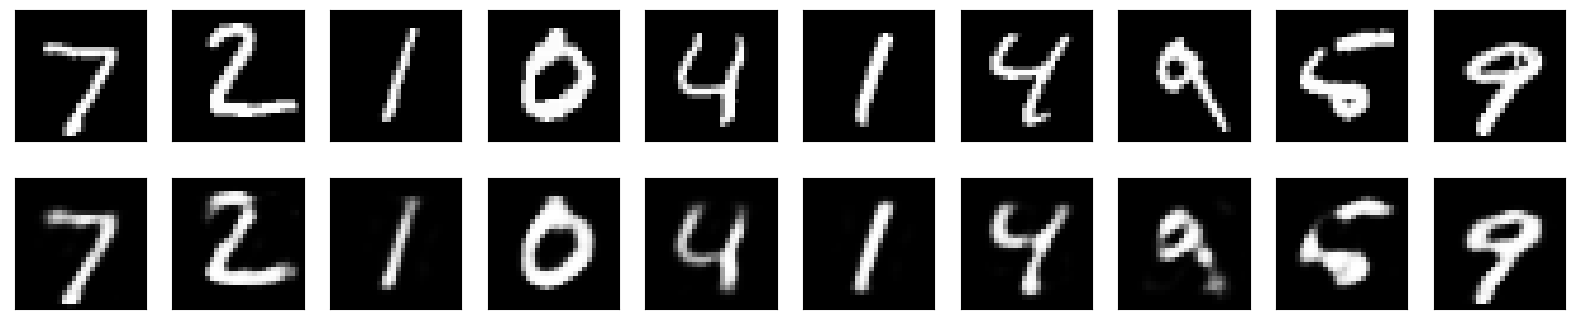

In [2]:
# Use the trained autoencoder to make predictions on the test data
decoded_imgs = autoencoder.predict(x_test)

# Use Matplotlib to visualize the reconstructed inputs
import matplotlib.pyplot as plt
n = 10  # number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

This code provides a simple implementation of an autoencoder using a single hidden layer, offering us a way to intuitively understand the performance of our autoencoder. To create a more sophisticated model, you could add more hidden layers, use different activation functions, add regularization techniques (like dropout or batch normalization), and so forth.

This gives us a solid foundation to start understanding how neural networks and autoencoders function. We can apply this same basic concept to selecting AGNs from the AGN DC Dataset.

To understand how the process of using an autoencoder relates to our dataset- the AGN DC: which is the Sloan Digital Sky Survey (SDSS) Stripe 82, and the XMM-Large Scale Structure (XMM-LSS), we need to consider the nature of the data and the benefits of the autoencoder model.

Our astronomical data sources provide us with a high-dimensional dataset. Each data point (e.g., an observed galaxy, star, or agn) might come with several associated attributes such as its light curve features, astrometry, photometry, color, morphology, etc. 

In this high-dimensional space, meaningful patterns or structures may not be immediately evident. Furthermore, as the data from these sources might not fully represent the diversity of astronomical objects that LSST will observe, direct application of supervised learning might lead to biased or incomplete models.

This is where autoencoders come into play. Autoencoders are a type of neural network that can learn to compress data into a lower-dimensional representation. In the encoding stage, the autoencoder learns to capture the most salient features of the data, effectively reducing its dimensionality. This process can help reveal underlying structure in the data that might be difficult to discern in the original high-dimensional space.

In the decoding stage, the autoencoder learns to reconstruct the original data from the compressed representation. By comparing the original data with the reconstructed data (as we do visually in the code block), we can get a sense of how well the autoencoder has learned to capture the essential features of the data. 

The encoded representation, or the "latent space", holds a compressed form of the data that ideally captures its most important features. This latent space can then be used as input to a supervised classification algorithm, which can be more manageable and more effective than working with the original high-dimensional data.

So, in our case, the autoencoder serves two purposes: 

i. It helps us explore and understand the structure of our high-dimensional astronomical data.

ii. It provides a form of unsupervised pre-training that can compensate for the underrepresentation in our training data. The autoencoder learns general features from the entire dataset, and this learning can then be fine-tuned with our specific but limited labeled data.

Thus, our visual comparison of original and autoencoder-reconstructed images (or data points) in the code block serves as an intuitive performance check for our model, indicating how well the autoencoder can capture the essential features of our complex astronomical dataset.

Extending this example to AGN Classification

We create a simplistic version of our dataset where each 'pixel' represents an astronomical observation (independent data point). The 'image' represents the collection of attributes for each astronomical object. We assume we have three classes- stars, quasars, and galaxies.

Now we apply our autoencoder to this dataset.

Here, we first generate random data for each of our three classes (stars, quasars, and galaxies). We then normalize this data to ensure it is suitable for input into our autoencoder.

The structure of the autoencoder is the same as before, with three dense layers for both encoding and decoding. After compiling the autoencoder, we train it on our synthetic data.

Finally, we use our trained autoencoder to generate reconstructed data points for each class. We visualize the original and reconstructed data points for each class using histograms. The x-axis of these histograms represents the range of data point values, while the y-axis represents the frequency of each value. By comparing the original and reconstructed histograms for each class, we can assess how well our autoencoder has learned to capture the essential features of our data.

In [3]:
# Assume we have three classes and create a list of class names
class_names = ['star', 'quasar', 'galaxy']

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Filter data for only "3", "5", "7" digits and normalize, flatten
star_data = x_train[y_train == 3].reshape(-1, 784).astype('float32') / 255
quasar_data = x_train[y_train == 5].reshape(-1, 784).astype('float32') / 255
galaxy_data = x_train[y_train == 7].reshape(-1, 784).astype('float32') / 255

# Concatenate all data into a single array
all_data = np.concatenate([star_data, quasar_data, galaxy_data])

# Normalizing the data by a MinMaxScaler and fit the scaler to the data and transform it
scaler = MinMaxScaler()
all_data = scaler.fit_transform(all_data)

# Apply PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
all_data = pca.fit_transform(all_data)

# Autoencoder
# Define input layer, you should change the input dimension to match the new data
input_layer = Input(shape=(all_data.shape[1],))
# Define the first, second, and final encoding layer which is the bottleneck
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# Define the first, second, and final decoding layer
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(all_data.shape[1], activation='sigmoid')(decoded) # The output layer should match the input dimension

# Instantiate the autoencoder model and compile it
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Fit the model to the data
autoencoder.fit(all_data, all_data,
                epochs=50,
                batch_size=256,
                shuffle=True)
# Generate reconstructions of the input data
decoded_data = autoencoder.predict(all_data)

Epoch 1/50
 1/70 [..............................] - ETA: 26s - loss: 2.8266

2023-08-20 18:04:36.224671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


70/70 [==============================] - 1s 8ms/step - loss: 2.2759
Epoch 2/50
70/70 [==============================] - 1s 7ms/step - loss: 1.8074
Epoch 3/50
70/70 [==============================] - 1s 7ms/step - loss: 1.7335
Epoch 4/50
70/70 [==============================] - 0s 7ms/step - loss: 1.7243
Epoch 5/50
70/70 [==============================] - 1s 7ms/step - loss: 1.7229
Epoch 6/50
70/70 [==============================] - 0s 7ms/step - loss: 1.7221
Epoch 7/50
70/70 [==============================] - 1s 7ms/step - loss: 1.7217
Epoch 8/50
70/70 [==============================] - 0s 7ms/step - loss: 1.7214
Epoch 9/50
70/70 [==============================] - 0s 7ms/step - loss: 1.7212
Epoch 10/50
70/70 [==============================] - 1s 7ms/step - loss: 1.7211
Epoch 11/50
70/70 [==============================] - 1s 7ms/step - loss: 1.7210
Epoch 12/50
70/70 [==============================] - 0s 7ms/step - loss: 1.7209
Epoch 13/50
70/70 [==============================] - 0s 7ms/

2023-08-20 18:05:01.786513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


557/557 [==============================] - 1s 2ms/step


557/557 [==============================] - 1s 2ms/step


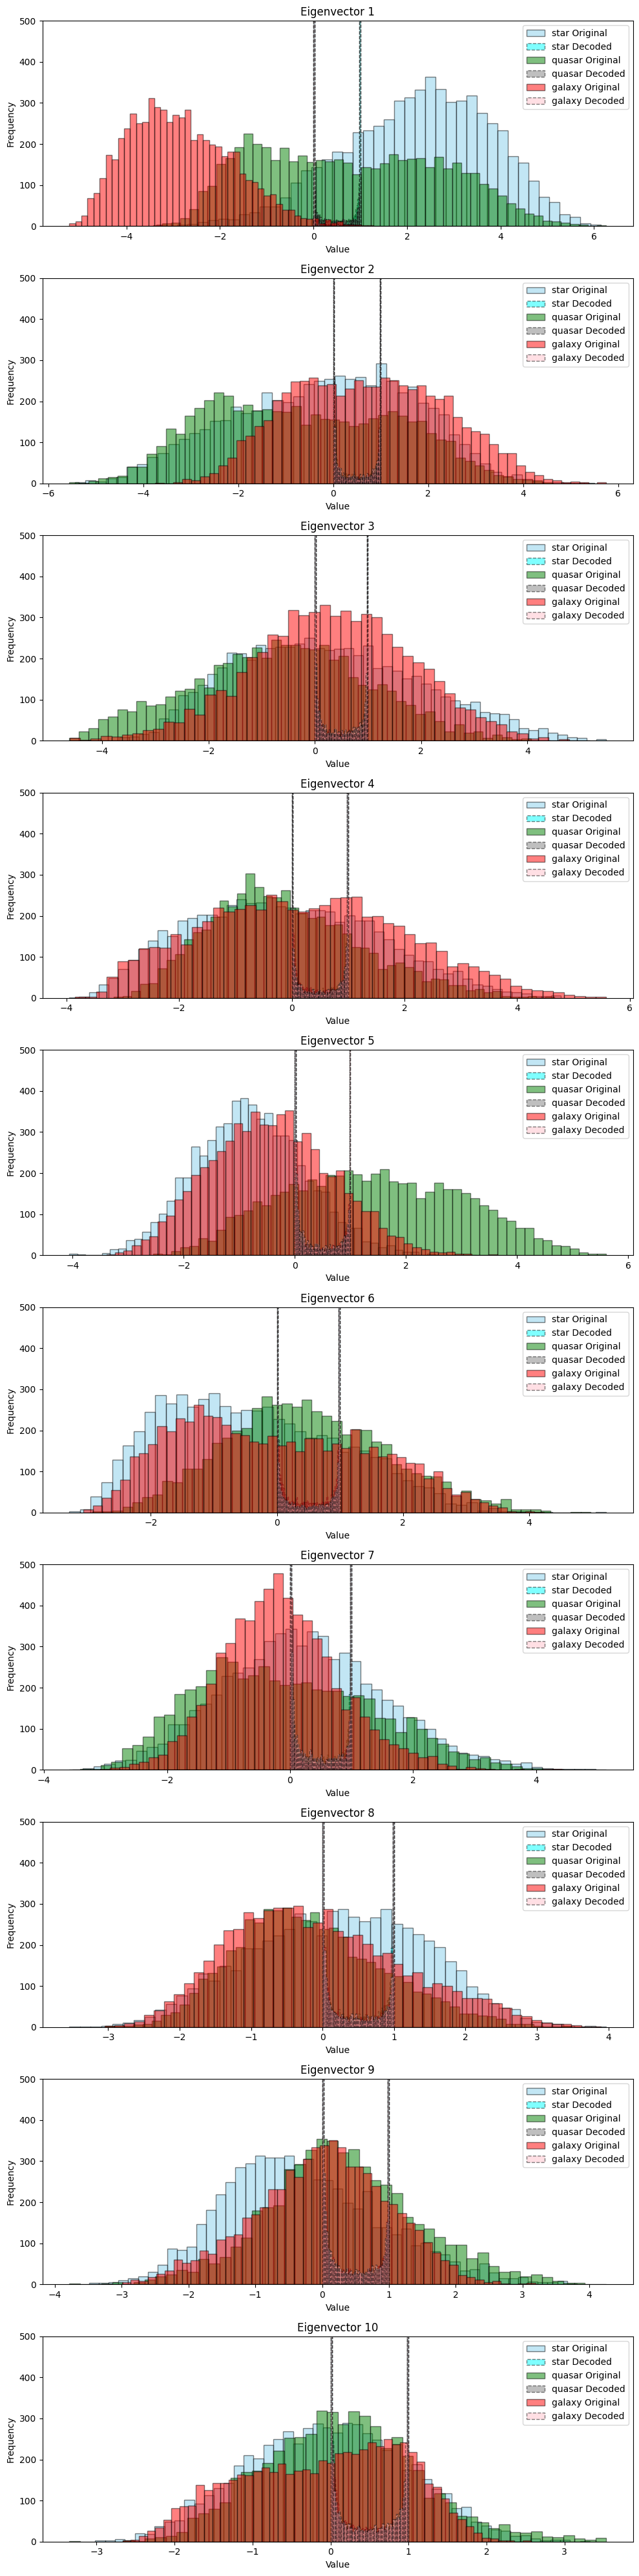

In [4]:
# Generate reconstructions of the PCA-reduced data
decoded_data_pca = autoencoder.predict(all_data)

# Visualize original and reconstructed 'data points' for each class
fig, axes = plt.subplots(10, 1, figsize=(10, 40))  # 10 plots for 10 eigenvectors

# Extract original high-dimensional data for each class
original_star_data = star_data.reshape(-1, 784)
original_quasar_data = quasar_data.reshape(-1, 784)
original_galaxy_data = galaxy_data.reshape(-1, 784)

# Define colors for each class (original and decoded)
colors_original = ['skyblue', 'green', 'red']
colors_decoded = ['cyan', 'grey', 'pink']

original_data_lengths = [original_star_data.shape[0], original_quasar_data.shape[0], original_galaxy_data.shape[0]]

# Loop over each eigenvector (i.e., each dimension of PCA-reduced data)
for i in range(10):  
    start_idx = 0
    # Loop over each class
    for j, class_name in enumerate(class_names):
        # Calculate index range based on the shape of the original star, quasar, and galaxy data
        end_idx = start_idx + original_data_lengths[j]

        # Extract original and decoded data for current class
        original_data_ij = all_data[start_idx:end_idx, i]
        decoded_data_ij = decoded_data[start_idx:end_idx, i]
        
        # Plot original data
        axes[i].hist(original_data_ij, bins=50, color=colors_original[j], edgecolor='black', alpha=0.5, label=f'{class_name} Original')
        
        # Plot decoded data
        axes[i].hist(decoded_data_ij, bins=50, color=colors_decoded[j], edgecolor='black', alpha=0.5, linestyle='dashed', label=f'{class_name} Decoded')
    
        start_idx = end_idx

    # Set title and labels, and add a legend
    axes[i].set_title(f'Eigenvector {i+1}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].set_ylim([0, 500])
    axes[i].legend()

plt.tight_layout()
plt.show()

#### We Now Begin Exploring the AGN DC:

## Importing Modules <a class="anchor" id="two"></a>

It is widely recommended to include the import statements for all the necessary modules at the beginning of a Jupyter Notebook or any Python program. 
This practice ensures that the required dependencies are properly imported and accessible at the required points in the code, thus avoiding any potential issues or errors related to missing modules or dependencies.

In [13]:
# Importing all required modules

# System modules allow Python programs to interact with the operating system and perform tasks 
# such as reading and writing files, managing processes, and accessing environment variables 
import os
import sys
import importlib
import pickle
import argparse
import itertools
import csv
from tqdm import tqdm
import time

# Data manipulation modules allow users to perform various operations on data,
# such as cleaning, transforming, aggregating, filtering, and visualizing data
import math
import numpy as np
import pandas as pd

# Visualization modules allow users to create visual representations of data
import matplotlib as mpl
import matplotlib.pyplot as plt
import palettable
import seaborn as sns
from bokeh.io import output_notebook, show
from bokeh.plotting import figure, output_file, show
# pd.set_option('display.max_columns', 1000)

# Scikit-learn provides a range of supervised and unsupervised learning algorithms,
# as well as tools for model selection and data preprocessing
from sklearn import model_selection, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, normalized_mutual_info_score, adjusted_rand_score

# Scipy is a Python library for scientific computing and technical computing
from scipy import stats
from scipy.optimize import linear_sum_assignment as linear_assignment

# Astropy is a Python library for astronomy and astrophysics
from astropy.io import fits
from astropy.table import Table

# TensorFlow is an open-source machine learning library that provides an extensive set of tools and libraries
# for building,training, and deploying neural networks, as well as other machine learning algorithms
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import MaxPooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

# PyTorch is an open-source machine learning library for Python that provides a range of tools
# and functions for building and training neural networks and other machine learning models
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader,TensorDataset
from torch.autograd import Variable

print(sys.version)

3.9.15 | packaged by conda-forge | (main, Nov 22 2022, 08:48:25) 
[Clang 14.0.6 ]


## Data Acquisition <a class="anchor" id="three"></a>

Data acquisition involves the collection and aggregation of data from diverse sources. This crucial initial stage in the data analysis pipeline entails recognizing data sources and acquiring the data in a format suitable for further analysis.

The provided statement establishes the data pathway. If an alternative data source is required, the line in the subsequent cell should be substituted accordingly.

In [14]:
# Defining a variable named 'data_dir' and assigning it the string value /Users/ash/Research/Data/AGN_DataChallenge/ 
# This is the path to the directory where the dataset is stored on the local machine
data_dir = '/Users/ash/Research/Data/AGN_DataChallenge/ObjectTable.parquet'

# Using the display() function to display the value of the 'data_dir' variable in the output of the Jupyter Notebook
display(data_dir)

'/Users/ash/Research/Data/AGN_DataChallenge/ObjectTable.parquet'

#### Data types

The measurements can be classified into several key categories:
- __Astrometry__ includes measurements of celestial coordinates such as right ascension (RA), declination (Dec), proper motion, and parallax.
- __Photometry__ encompasses both point and extended source photometry, providing measurements in terms of AB magnitudes and fluxes (expressed in nJy).
- __Color__ is determined by computing the ratios of fluxes in different wavelength bands.
- __Morphology__ is indicated by a binary value, with 1 representing extended sources and 0 representing point-like sources.
- __Light Curve Features__ are extracted from the SDSS light curves when a match is found.
- __Redshift__ is provided whenever available, including both spectroscopic and photometric measurements.

Inspecting the attributes

In [15]:
object_df = pd.read_parquet(data_dir)
display(object_df.describe())
display(object_df.shape)

# Number of objects in each class + unlabeled
display(object_df['class'].value_counts())
display("Number of unlabeled objects: {}".format(object_df['class'].isna().sum()))

,ra,dec,psPm_ra,psPm_dec,psParallax,psFlux_u,psFlux_g,psFlux_r,psFlux_i,psFlux_z,...,lcNonPeriodic[27]_g,lcNonPeriodic[27]_r,lcNonPeriodic[27]_i,lcNonPeriodic[27]_z,lcNonPeriodic[28]_u,lcNonPeriodic[28]_g,lcNonPeriodic[28]_r,lcNonPeriodic[28]_i,lcNonPeriodic[28]_z,ebv
count,446487.000000,446487.000000,4.409540e+05,4.409540e+05,134086.000000,3.837000e+05,4.327770e+05,4.349760e+05,4.344730e+05,4.353380e+05,...,2.086340e+05,2.086260e+05,2.086260e+05,2.086360e+05,208647.000000,208634.000000,208626.000000,208626.000000,208636.000000,446487.000000
mean,113.444616,-0.366125,-1.573980e+02,3.466920e+02,0.632487,2.088371e+04,6.637403e+04,1.204108e+05,1.441588e+05,1.825155e+05,...,1.630352e-01,1.500006e-01,1.544376e-01,1.564321e-01,1074.567277,336.663047,252.196483,213.479630,673.852825,0.042991
std,142.250504,2.913140,2.668886e+05,2.288902e+05,1.271928,8.627008e+04,2.603277e+05,5.643356e+06,4.128693e+05,5.371203e+05,...,4.120180e-01,3.391911e-01,3.449507e-01,4.031540e-01,4250.521486,2162.567758,1587.289403,1351.681347,3356.310106,0.024886
min,0.000281,-63.348846,-1.549250e+08,-4.577680e+07,-17.428825,-3.010739e+05,-1.205824e+05,-3.882952e+04,-1.929064e+03,-8.334768e+03,...,5.854756e-08,5.854756e-08,5.854756e-08,5.854756e-08,0.018316,0.018316,0.018316,0.018316,0.018316,0.005440
25%,16.222099,-1.734935,-2.651840e+00,-4.435840e+00,0.042136,8.334138e+02,2.117627e+03,4.649031e+03,8.016084e+03,1.033239e+04,...,1.404330e-02,1.267155e-02,1.132901e-02,1.049035e-02,1.550629,0.832346,0.515604,0.589236,1.262626,0.026742
50%,33.608160,-0.174219,1.751340e-01,-4.706605e-01,0.396610,2.269940e+03,4.816601e+03,1.285625e+04,2.199475e+04,2.979533e+04,...,3.322668e-02,3.410033e-02,3.464072e-02,3.124982e-02,10.204748,5.822918,3.574042,3.669372,6.927093,0.034057
75%,320.663727,1.096750,4.129985e+00,2.756258e+00,0.960485,1.026092e+04,2.554773e+04,4.949970e+04,7.176169e+04,8.989345e+04,...,1.167255e-01,1.274892e-01,1.333405e-01,1.097157e-01,145.721905,78.707282,60.275080,41.841657,56.328877,0.050708
max,359.999343,71.652336,7.469720e+07,8.200310e+07,30.256895,6.037682e+06,1.028422e+07,3.714715e+09,2.010603e+07,3.361230e+07,...,1.436499e+01,1.080583e+01,3.405070e+01,1.393099e+01,22026.465795,22026.465795,22026.465795,22026.465795,22026.465795,1.285118


(446487, 384)

Gal         246225
Star         96715
Qso          83130
Agn           5608
highZQso      1089
Name: class, dtype: int64

'Number of unlabeled objects: 13720'

Stripe 82 is a region of the sky that has been observed multiple times by the Sloan Digital Sky Survey (SDSS). It is located along the celestial equator and covers about 300 square degrees. Because Stripe 82 has been observed so many times, it has very deep imaging, which means it can detect fainter objects than a typical SDSS image.

XMM-LSS stands for XMM-Large Scale Structure. It's an X-ray survey of the sky conducted by the XMM-Newton space telescope. It covers a region of about 11.1 square degrees and is designed to study large-scale cosmic structures like galaxy clusters and cosmic filaments.

The merging of these datasets likely aims to provide a more comprehensive view of the studied celestial objects, combining data from both optical (Stripe 82) and X-ray (XMM-LSS) observations.

#### Data Munging

In [16]:
# Replace original class labels with numerical values for easier processing
# 'Star' is assigned 0, 'Gal' is assigned 1, and 'Qso', 'Agn', 'highZQso' are assigned 2
# Effectively, 'Agn' and 'highZQso' are merged into 'Qso' class
object_df_new = object_df.replace({'class': {'Star': 0, 'Gal': 1, 'Qso': 2, 'Agn': 2, 'highZQso': 2}})

# Display the shape of 'class' column in the new dataframe to see total instances
display(object_df_new['class'].shape)

# Count and display number of instances for each class (0, 1, 2)
display(object_df_new['class'].value_counts())

# Calculate and display the number of instances in 'class' column with no label (NaN values)
display("Number of unlabeled objects: {}".format(object_df_new['class'].isna().sum()))

(446487,)

1.0    246225
0.0     96715
2.0     89827
Name: class, dtype: int64

'Number of unlabeled objects: 13720'

#### Exploratory Data Analysis

Our goal is to be able to distinguish one type of astronomical source from another. Specifically, AGNs and quasars from stars (of various temperatures), normal (inactive) galaxies, exploding stars, etc. These different objects emit different amounts of light at the different wavelengths.

We split the wavelength region into multiple bands, specifically for our dataset, the main source being SDSS- it is 5 bands: ugriz

The relevant features in our dataset fluxes in each of the ugriz bandpasses: psFlux

In [17]:
attr_list = [
    # Point source parallax and proper motion
    'psParallax', 'psPm_ra', 'psPm_dec',

    # Point source flux in different bands
    'psFlux_u', 'psFlux_g', 'psFlux_r', 'psFlux_i', 'psFlux_z', 'psFlux_y',

    # Point source flux errors in different bands
    'psFluxErr_u', 'psFluxErr_g', 'psFluxErr_r', 'psFluxErr_i', 'psFluxErr_z', 'psFluxErr_y',

    # Bright disk flux in different bands
    'bdFlux_u', 'bdFlux_g', 'bdFlux_r', 'bdFlux_i', 'bdFlux_z', 'bdFlux_y',

    # Bright disk flux errors in different bands
    'bdFluxErr_u', 'bdFluxErr_g', 'bdFluxErr_r', 'bdFluxErr_i', 'bdFluxErr_z', 'bdFluxErr_y',

    # Point source magnitude in different bands
    'psMag_u', 'psMag_g', 'psMag_r', 'psMag_i', 'psMag_z', 'psMag_y',

    # Point source magnitude errors in different bands
    'psMagErr_u', 'psMagErr_g', 'psMagErr_r', 'psMagErr_i', 'psMagErr_z', 'psMagErr_y',

    # Bright disk magnitude in different bands
    'bdMag_u', 'bdMag_g', 'bdMag_r', 'bdMag_i', 'bdMag_z', 'bdMag_y',

    # Bright disk magnitude errors in different bands
    'bdMagErr_u', 'bdMagErr_g', 'bdMagErr_r', 'bdMagErr_i', 'bdMagErr_z', 'bdMagErr_y',

    # Extendedness in different bands
    'extendedness_u', 'extendedness_g', 'extendedness_r', 'extendedness_i', 'extendedness_z', 'extendedness_y',

    # Standard colors and their errors
    'stdColor_0', 'stdColor_1', 'stdColor_2', 'stdColor_3', 'stdColor_4', 
    'stdColorErr_0', 'stdColorErr_1', 'stdColorErr_2', 'stdColorErr_3', 'stdColorErr_4',

    # Class, estimated photometric redshift, true redshift, and flags in different bands
    'class', 'photoZ_pest', 'z','ebv', 'flags_u', 'flags_g', 'flags_r', 'flags_i', 'flags_z', 'flags_y',

    # Spectroscopic identifiers
    'spec_fiberid', 'spec_plate', 'spec_mjd',

    # Light curve periodic features in different bands for different periodic indices
    'lcPeriodic[0]_g',
    'lcPeriodic[0]_r', 'lcPeriodic[0]_i', 'lcPeriodic[1]_g', 'lcPeriodic[1]_r', 'lcPeriodic[1]_i', 
    'lcPeriodic[2]_g','lcPeriodic[2]_r', 'lcPeriodic[2]_i', 'lcPeriodic[3]_g', 'lcPeriodic[3]_r', 
    'lcPeriodic[3]_i', 'lcPeriodic[4]_u','lcPeriodic[4]_g', 'lcPeriodic[4]_r', 'lcPeriodic[4]_i', 
    'lcPeriodic[4]_z', 'lcPeriodic[5]_u', 'lcPeriodic[5]_g','lcPeriodic[5]_r', 'lcPeriodic[5]_i', 
    'lcPeriodic[5]_z', 'lcPeriodic[6]_u', 'lcPeriodic[6]_g', 'lcPeriodic[6]_r','lcPeriodic[6]_i', 
    'lcPeriodic[6]_z', 'lcPeriodic[7]_u', 'lcPeriodic[7]_g', 'lcPeriodic[7]_r', 'lcPeriodic[7]_i',
    'lcPeriodic[7]_z', 'lcPeriodic[8]_u', 'lcPeriodic[8]_g', 'lcPeriodic[8]_r', 'lcPeriodic[8]_i',
    'lcPeriodic[8]_z','lcPeriodic[9]_u', 'lcPeriodic[9]_g', 'lcPeriodic[9]_r', 'lcPeriodic[9]_i', 
    'lcPeriodic[9]_z', 'lcPeriodic[10]_u','lcPeriodic[10]_g', 'lcPeriodic[10]_r', 'lcPeriodic[10]_i', 
    'lcPeriodic[10]_z', 'lcPeriodic[11]_u',  'lcPeriodic[11]_g', 'lcPeriodic[11]_r', 'lcPeriodic[11]_i', 
    'lcPeriodic[11]_z', 'lcPeriodic[12]_u', 'lcPeriodic[12]_g', 'lcPeriodic[12]_r', 'lcPeriodic[12]_i', 
    'lcPeriodic[12]_z', 'lcPeriodic[13]_u',  'lcPeriodic[13]_g', 'lcPeriodic[13]_r', 'lcPeriodic[13]_i', 
    'lcPeriodic[13]_z', 'lcPeriodic[14]_u', 'lcPeriodic[14]_g', 'lcPeriodic[14]_r', 'lcPeriodic[14]_i', 
    'lcPeriodic[14]_z', 'lcPeriodic[15]_u', 'lcPeriodic[15]_g', 'lcPeriodic[15]_r', 'lcPeriodic[15]_i', 
    'lcPeriodic[15]_z', 'lcPeriodic[16]_u',  'lcPeriodic[16]_g', 'lcPeriodic[16]_r', 'lcPeriodic[16]_i', 
    'lcPeriodic[16]_z', 'lcPeriodic[17]_u','lcPeriodic[17]_g', 'lcPeriodic[17]_r', 'lcPeriodic[17]_i', 
    'lcPeriodic[17]_z', 'lcPeriodic[18]_u','lcPeriodic[18]_g', 'lcPeriodic[18]_r', 'lcPeriodic[18]_i', 
    'lcPeriodic[18]_z', 'lcPeriodic[19]_u','lcPeriodic[19]_g', 'lcPeriodic[19]_r', 'lcPeriodic[19]_i', 
    'lcPeriodic[19]_z', 'lcPeriodic[20]_u','lcPeriodic[20]_g', 'lcPeriodic[20]_r', 'lcPeriodic[20]_i', 
    'lcPeriodic[20]_z', 'lcPeriodic[21]_u', 'lcPeriodic[21]_g', 'lcPeriodic[21]_r', 'lcPeriodic[21]_i', 
    'lcPeriodic[21]_z', 'lcPeriodic[22]_u', 'lcPeriodic[22]_g', 'lcPeriodic[22]_r', 'lcPeriodic[22]_i', 
    'lcPeriodic[22]_z', 'lcPeriodic[23]_u', 'lcPeriodic[23]_g', 'lcPeriodic[23]_r', 'lcPeriodic[23]_i', 
    'lcPeriodic[23]_z', 'lcPeriodic[24]_u', 'lcPeriodic[24]_g', 'lcPeriodic[24]_r', 'lcPeriodic[24]_i', 
    'lcPeriodic[24]_z', 'lcPeriodic[25]_u',  'lcPeriodic[25]_g', 'lcPeriodic[25]_r', 'lcPeriodic[25]_i',
    'lcPeriodic[25]_z', 'lcPeriodic[26]_u',  'lcPeriodic[26]_g', 'lcPeriodic[26]_r', 'lcPeriodic[26]_i', 
    'lcPeriodic[26]_z', 'lcPeriodic[27]_u',  'lcPeriodic[27]_g', 'lcPeriodic[27]_r', 'lcPeriodic[27]_i',
    'lcPeriodic[27]_z', 'lcPeriodic[28]_u', 'lcPeriodic[28]_g', 'lcPeriodic[28]_r', 'lcPeriodic[28]_i', 
    'lcPeriodic[28]_z', 'lcPeriodic[29]_u', 'lcPeriodic[29]_g', 'lcPeriodic[29]_r', 'lcPeriodic[29]_i', 
    'lcPeriodic[29]_z', 'lcPeriodic[30]_u', 'lcPeriodic[30]_g', 'lcPeriodic[30]_r', 'lcPeriodic[30]_i', 
    'lcPeriodic[30]_z', 'lcPeriodic[31]_u',  'lcPeriodic[31]_g', 'lcPeriodic[31]_r', 'lcPeriodic[31]_i',
    'lcPeriodic[31]_z', 'lcPeriodic[32]_u', 'lcPeriodic[32]_g', 'lcPeriodic[32]_r', 'lcPeriodic[32]_i',
    'lcPeriodic[32]_z',

    # Light curve non-periodic features in different bands for different non-periodic indices
    'lcNonPeriodic[0]_u',
    'lcNonPeriodic[0]_g', 'lcNonPeriodic[0]_r', 'lcNonPeriodic[0]_i', 'lcNonPeriodic[0]_z', 'lcNonPeriodic[1]_u',
    'lcNonPeriodic[1]_g', 'lcNonPeriodic[1]_r', 'lcNonPeriodic[1]_i', 'lcNonPeriodic[1]_z', 'lcNonPeriodic[2]_u',
    'lcNonPeriodic[2]_g', 'lcNonPeriodic[2]_r', 'lcNonPeriodic[2]_i', 'lcNonPeriodic[2]_z', 'lcNonPeriodic[3]_u',
    'lcNonPeriodic[3]_g', 'lcNonPeriodic[3]_r', 'lcNonPeriodic[3]_i', 'lcNonPeriodic[3]_z', 'lcNonPeriodic[4]_u',
    'lcNonPeriodic[4]_g', 'lcNonPeriodic[4]_r', 'lcNonPeriodic[4]_i', 'lcNonPeriodic[4]_z', 'lcNonPeriodic[5]_u',
    'lcNonPeriodic[5]_g', 'lcNonPeriodic[5]_r', 'lcNonPeriodic[5]_i', 'lcNonPeriodic[5]_z', 'lcNonPeriodic[6]_u',
    'lcNonPeriodic[6]_g', 'lcNonPeriodic[6]_r', 'lcNonPeriodic[6]_i', 'lcNonPeriodic[6]_z', 'lcNonPeriodic[7]_u', 
    'lcNonPeriodic[7]_g', 'lcNonPeriodic[7]_r', 'lcNonPeriodic[7]_i', 'lcNonPeriodic[7]_z', 'lcNonPeriodic[8]_u',
    'lcNonPeriodic[8]_g', 'lcNonPeriodic[8]_r', 'lcNonPeriodic[8]_i', 'lcNonPeriodic[8]_z', 'lcNonPeriodic[9]_u',
    'lcNonPeriodic[9]_g', 'lcNonPeriodic[9]_r', 'lcNonPeriodic[9]_i', 'lcNonPeriodic[9]_z', 'lcNonPeriodic[10]_u',
    'lcNonPeriodic[10]_g', 'lcNonPeriodic[10]_r', 'lcNonPeriodic[10]_i', 'lcNonPeriodic[10]_z',
    'lcNonPeriodic[11]_u', 'lcNonPeriodic[11]_g', 'lcNonPeriodic[11]_r', 'lcNonPeriodic[11]_i',
    'lcNonPeriodic[11]_z', 'lcNonPeriodic[12]_u', 'lcNonPeriodic[12]_g', 'lcNonPeriodic[12]_r', 
    'lcNonPeriodic[12]_i', 'lcNonPeriodic[12]_z', 'lcNonPeriodic[13]_u', 'lcNonPeriodic[13]_g',
    'lcNonPeriodic[13]_r', 'lcNonPeriodic[13]_i', 'lcNonPeriodic[13]_z', 'lcNonPeriodic[14]_u', 
    'lcNonPeriodic[14]_g', 'lcNonPeriodic[14]_r', 'lcNonPeriodic[14]_i', 'lcNonPeriodic[14]_z', 
    'lcNonPeriodic[15]_u', 'lcNonPeriodic[15]_g', 'lcNonPeriodic[15]_r', 'lcNonPeriodic[15]_i', 
    'lcNonPeriodic[15]_z', 'lcNonPeriodic[16]_u', 'lcNonPeriodic[16]_g', 'lcNonPeriodic[16]_r', 
    'lcNonPeriodic[16]_i', 'lcNonPeriodic[16]_z', 'lcNonPeriodic[17]_u', 'lcNonPeriodic[17]_g', 
    'lcNonPeriodic[17]_r', 'lcNonPeriodic[17]_i', 'lcNonPeriodic[17]_z', 'lcNonPeriodic[18]_u',
    'lcNonPeriodic[18]_g', 'lcNonPeriodic[18]_r', 'lcNonPeriodic[18]_i', 'lcNonPeriodic[18]_z',
    'lcNonPeriodic[19]_u', 'lcNonPeriodic[19]_g', 'lcNonPeriodic[19]_r', 'lcNonPeriodic[19]_i', 
    'lcNonPeriodic[19]_z', 'lcNonPeriodic[20]_u', 'lcNonPeriodic[20]_g', 'lcNonPeriodic[20]_r', 
    'lcNonPeriodic[20]_i', 'lcNonPeriodic[20]_z', 'lcNonPeriodic[21]_u', 'lcNonPeriodic[21]_g',
    'lcNonPeriodic[21]_r', 'lcNonPeriodic[21]_i', 'lcNonPeriodic[21]_z', 'lcNonPeriodic[22]_u', 
    'lcNonPeriodic[22]_g', 'lcNonPeriodic[22]_r', 'lcNonPeriodic[22]_i', 'lcNonPeriodic[22]_z', 
    'lcNonPeriodic[23]_u', 'lcNonPeriodic[23]_g', 'lcNonPeriodic[23]_r', 'lcNonPeriodic[23]_i', 
    'lcNonPeriodic[23]_z', 'lcNonPeriodic[24]_u', 'lcNonPeriodic[24]_g', 'lcNonPeriodic[24]_r',
    'lcNonPeriodic[24]_i', 'lcNonPeriodic[24]_z', 'lcNonPeriodic[25]_u', 'lcNonPeriodic[25]_g', 
    'lcNonPeriodic[25]_r', 'lcNonPeriodic[25]_i', 'lcNonPeriodic[25]_z', 'lcNonPeriodic[26]_u',
    'lcNonPeriodic[26]_g', 'lcNonPeriodic[26]_r', 'lcNonPeriodic[26]_i', 'lcNonPeriodic[26]_z', 
    'lcNonPeriodic[27]_u', 'lcNonPeriodic[27]_g', 'lcNonPeriodic[27]_r', 'lcNonPeriodic[27]_i', 
    'lcNonPeriodic[27]_z', 'lcNonPeriodic[28]_u', 'lcNonPeriodic[28]_g', 'lcNonPeriodic[28]_r',
    'lcNonPeriodic[28]_i','lcNonPeriodic[28]_z'
            ]

#### Color-Color Plots

The color-color plots are created before passing data into the autoencoder to provide an exploratory visualization of the data distributions and potential correlations or clusters. These plots can also help identify any noticeable patterns, anomalies, or trends in the data across different categories (Star, Galaxy, Quasar), which could influence how the autoencoder learns to represent the data.

Define separate data frames for the stars, galaxies, and quasars (and unlabeled objects).

In [18]:
short_list = ['psMag_i', 'psPm_ra', 'psPm_dec',\
                'stdColor_0', 'stdColor_1', 'stdColor_2', 'stdColor_3',\
                'lcNonPeriodic[15]_i', 'lcNonPeriodic[26]_i',\
                'class','z']

In [19]:
# Filter the data for 'Star', 'Gal', and 'Quasar' objects and remove rows with any missing values
object_df_new_Star = object_df_new[short_list].loc[(object_df_new['class'] == 0)].dropna()
object_df_new_Gal = object_df_new[short_list].loc[(object_df_new['class'] == 1)].dropna()
object_df_new_Quasar = object_df_new[short_list].loc[(object_df_new['class'] == 2)].dropna()

In [20]:
# Filter for rows where the 'class' is unlabeled (NaN) and drop the 'class' and 'z' columns
object_df_new_Unlab = object_df_new[short_list][object_df_new['class'].isna()]
object_df_new_Unlab.drop(['class','z'],axis=1,inplace=True)
object_df_new_Unlab.dropna(inplace=True)

In [21]:
# Print out the number of instances in each class-specific dataset and in the unlabeled dataset
print(object_df_new_Star.shape[0])
print(object_df_new_Gal.shape[0])
print(object_df_new_Quasar.shape[0])
print(object_df_new_Unlab.shape[0])

69191
62321
37878
9467


In [22]:
#Define function that will be used to make plot similar to scatter_dot in SM
#Thus contour+dot plot style is necessary given the data volume and also the importance of outliers

def contour_scatter(x, y, exkernel=None, ax=None, color='C0', cmap='Blues_r',
                    lims=None, levels=None, scatter=True, nlevel=1,
                    kwargs_contour={},
                    kwargs_plot={}):
    """ Contour and scatter plot with no points inside contours """


    if ax is None:
        ax = plt.gca()
    # fig, ax = plt.subplots(1)
    if lims is None:
        xmin = x.min()
        xmax = x.max()
        ymin = y.min()
        ymax = y.max()
    else:
        xmin, xmax, ymin, ymax = lims

    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)

    CS = ax.contour(X,
                    Y,
                    Z,
                    cmap=cmap,
                    levels=levels,
                    **kwargs_contour)

    if scatter is True:
        #print(CS.levels)
        threshold = CS.levels[nlevel] # nlevel=1 or 0 depending on Python version?
        z = kernel(values)

        # mask points above density threshold
        x = np.ma.array(x)
        y = np.ma.array(y)
        if exkernel:
            exz = exkernel(values)
            x[exz > threshold] = np.ma.masked
            y[exz > threshold] = np.ma.masked

        x[z > threshold] = np.ma.masked
        y[z > threshold] = np.ma.masked

        ax.scatter(x, y, color=color, **kwargs_plot)

    if exkernel is False:
        return kernel
    
    
#4-class Dark
csdark = palettable.colorbrewer.qualitative.Dark2_4.mpl_colors

0
1
2
3


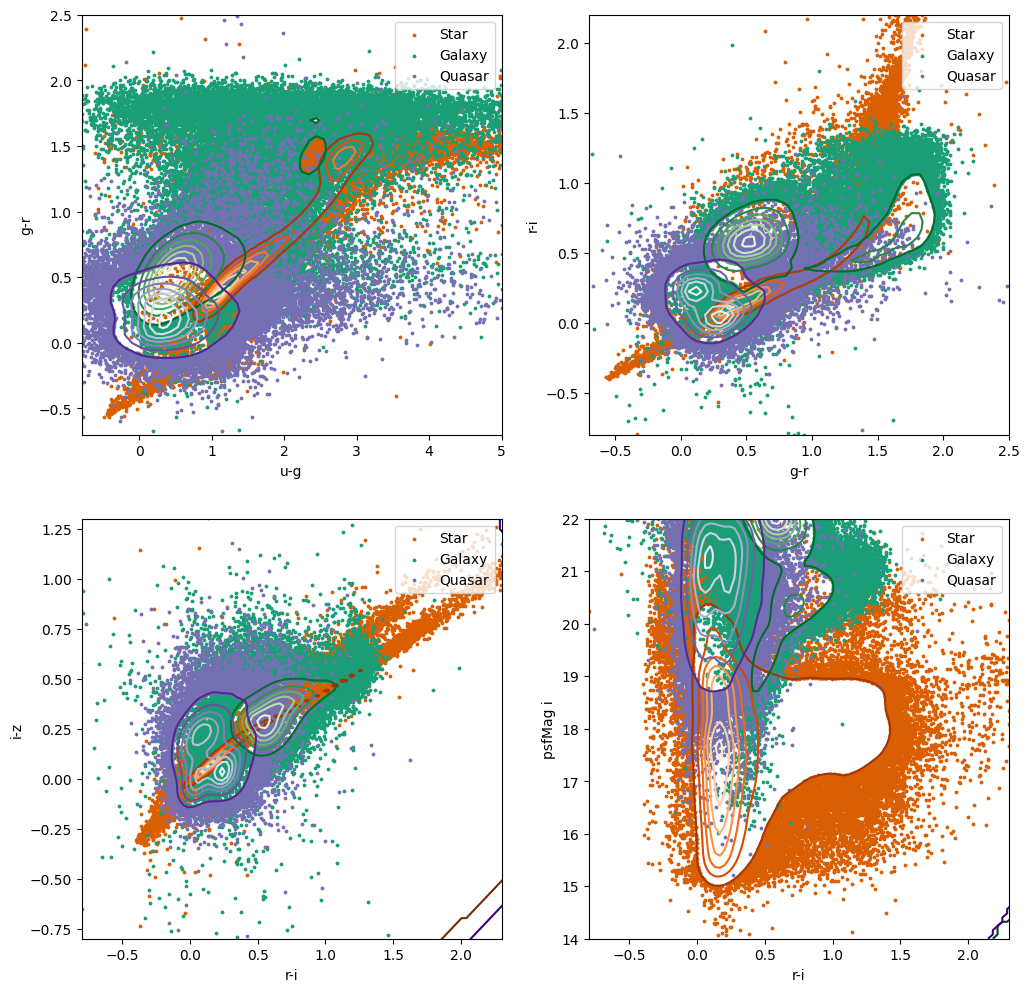

In [23]:
limsugr = np.array([[-2,8], [-2,4]])
limsugr = limsugr.flatten()
limsgri = np.array([[-2,4], [-2,3.5]])
limsgri = limsgri.flatten()
limsriz = np.array([[-1,2.5], [-1,1.5]])
limsriz = limsriz.flatten()
limsriimag = np.array([[-1,2.5], [14,22]])
limsriimag = limsriimag.flatten()
levels = None
nlevel=1

# Make the figure:
#fig,ax = plt.figure(figsize=(8,8))
fig, ax = plt.subplots(2,2,figsize=(12,12))


handles, labels = (0, 0)

    
for i, axis in enumerate(ax.ravel()):
    print(i)

    if i==0: 
        contour_scatter(object_df_new_Star['stdColor_0'], object_df_new_Star['stdColor_1'], lims=limsugr, levels=levels, nlevel=nlevel, cmap='Oranges_r', color=csdark[1], kwargs_plot={'rasterized':True, 's':3, 'label': 'Star'}, ax=axis)
        contour_scatter(object_df_new_Gal['stdColor_0'], object_df_new_Gal['stdColor_1'], lims=limsugr, levels=levels, nlevel=nlevel, cmap='Greens_r', color=csdark[0], kwargs_plot={'rasterized':True, 's':3, 'label': 'Galaxy'}, ax=axis)
        contour_scatter(object_df_new_Quasar['stdColor_0'], object_df_new_Quasar['stdColor_1'], lims=limsugr, levels=levels, nlevel=nlevel, cmap='Purples_r', color=csdark[2], kwargs_plot={'rasterized':True, 's':3, 'label': 'Quasar'}, ax=axis)
        #Do the unlabeled in another set of plots to avoid confusion
        #contour_scatter(object_df_new_Unlab['stdColor_0'], object_df_new_Unlab['stdColor_1'], lims=limsugr, levels=levels, nlevel=nlevel, cmap='gray', color='k', kwargs_plot={'rasterized':True, 's':3}, ax=axis)
        axis.set_xlim(-0.8,5)
        axis.set_ylim(-0.7,2.5)
        axis.set_xlabel('u-g')
        axis.set_ylabel('g-r')
        axis.legend(loc='upper right')
        axis.set_box_aspect(1)

    if i==1:
        contour_scatter(object_df_new_Star['stdColor_1'], object_df_new_Star['stdColor_2'], lims=limsgri, levels=levels, nlevel=nlevel, cmap='Oranges_r', color=csdark[1], kwargs_plot={'rasterized':True, 's':3, 'label': 'Star'}, ax=axis)
        contour_scatter(object_df_new_Gal['stdColor_1'], object_df_new_Gal['stdColor_2'], lims=limsgri, levels=levels, nlevel=nlevel, cmap='Greens_r', color=csdark[0], kwargs_plot={'rasterized':True, 's':3,'label': 'Galaxy'}, ax=axis)
        contour_scatter(object_df_new_Quasar['stdColor_1'], object_df_new_Quasar['stdColor_2'], lims=limsgri, levels=levels, nlevel=nlevel, cmap='Purples_r', color=csdark[2], kwargs_plot={'rasterized':True, 's':3, 'label': 'Quasar'}, ax=axis)
        #contour_scatter(object_df_new_Unlab['stdColor_1'], object_df_new_Unlab['stdColor_2'], lims=limsgri, levels=levels, nlevel=nlevel, cmap='gray', color='k', kwargs_plot={'rasterized':True, 's':3}, ax=axis)
        axis.set_xlim(-0.7,2.5)
        axis.set_ylim(-0.8,2.2)
        axis.set_xlabel('g-r')
        axis.set_ylabel('r-i')
        axis.legend(loc='upper right')
        axis.set_box_aspect(1)
        
    if i==2:
        contour_scatter(object_df_new_Star['stdColor_2'], object_df_new_Star['stdColor_3'], lims=limsriz, levels=levels, nlevel=nlevel, cmap='Oranges_r', color=csdark[1], kwargs_plot={'rasterized':True, 's':3, 'label': 'Star'}, ax=axis)
        contour_scatter(object_df_new_Gal['stdColor_2'], object_df_new_Gal['stdColor_3'], lims=limsriz, levels=levels, nlevel=nlevel, cmap='Greens_r', color=csdark[0], kwargs_plot={'rasterized':True, 's':3,'label': 'Galaxy'}, ax=axis)
        contour_scatter(object_df_new_Quasar['stdColor_2'], object_df_new_Quasar['stdColor_3'], lims=limsriz, levels=levels, nlevel=nlevel, cmap='Purples_r', color=csdark[2], kwargs_plot={'rasterized':True, 's':3, 'label': 'Quasar'}, ax=axis)
        #contour_scatter(object_df_new_Unlab['stdColor_2'], object_df_new_Unlab['stdColor_3'], lims=limsriz, levels=levels, nlevel=nlevel, cmap='gray', color='k', kwargs_plot={'rasterized':True, 's':3}, ax=axis)
        axis.set_xlim(-0.8,2.3)
        axis.set_ylim(-0.8,1.3)
        axis.set_xlabel('r-i')
        axis.set_ylabel('i-z')
        axis.legend(loc='upper right')
        axis.set_box_aspect(1)
        
    if i==3:
        contour_scatter(object_df_new_Star['stdColor_2'], object_df_new_Star['psMag_i'], lims=limsriimag, levels=levels, nlevel=nlevel, cmap='Oranges_r', color=csdark[1], kwargs_plot={'rasterized':True, 's':3, 'label': 'Star'}, ax=axis)
        contour_scatter(object_df_new_Gal['stdColor_2'], object_df_new_Gal['psMag_i'], lims=limsriimag, levels=levels, nlevel=nlevel, cmap='Greens_r', color=csdark[0], kwargs_plot={'rasterized':True, 's':3,'label': 'Galaxy'}, ax=axis)
        contour_scatter(object_df_new_Quasar['stdColor_2'], object_df_new_Quasar['psMag_i'], lims=limsriimag, levels=levels, nlevel=nlevel, cmap='Purples_r', color=csdark[2], kwargs_plot={'rasterized':True, 's':3,'label': 'Quasar'}, ax=axis)
        #contour_scatter(object_df_new_Unlab['stdColor_2'], object_df_new_Unlab['psMag_i'], lims=limsriimag, levels=levels, nlevel=nlevel, cmap='gray', color='k', kwargs_plot={'rasterized':True, 's':3}, ax=axis)
        axis.set_xlim(-0.8,2.3)
        axis.set_ylim(14,22)
        axis.set_xlabel('r-i')
        axis.set_ylabel('psfMag i')
        axis.legend(loc='upper right')
        axis.set_box_aspect(1)


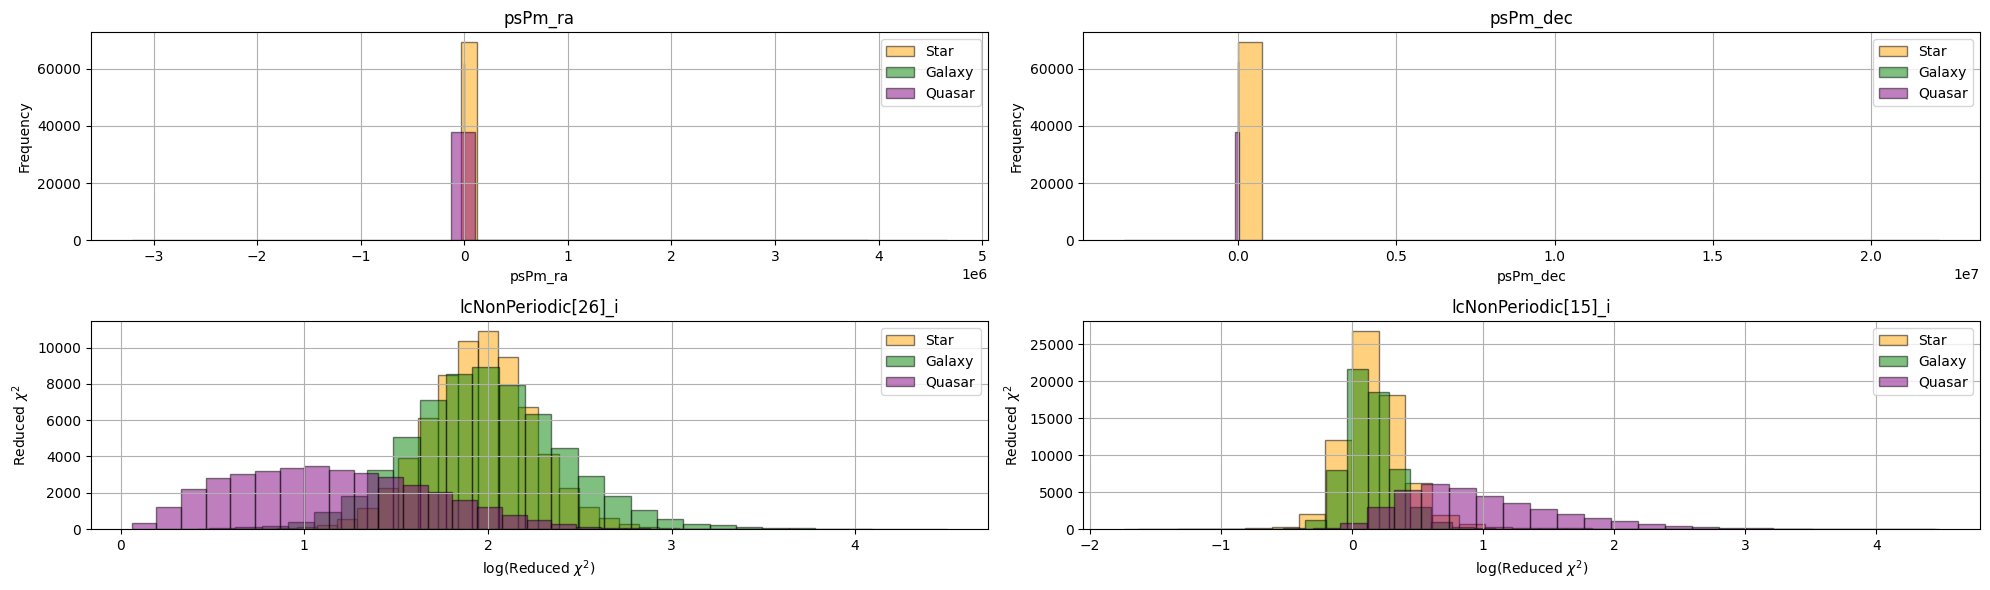

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(20, 6)) # 1 row, 3 columns

#Proper Motion RA
# histogram for Star
axs[0, 0].hist(object_df_new_Star['psPm_ra'], bins=30, alpha=0.5, label='Star', edgecolor='black', color='orange')
# histogram for Galaxy
axs[0, 0].hist(object_df_new_Gal['psPm_ra'], bins=30, alpha=0.5, label='Galaxy', edgecolor='black', color='green')
# histogram for Quasar
axs[0, 0].hist(object_df_new_Quasar['psPm_ra'], bins=30, alpha=0.5, label='Quasar', edgecolor='black', color='purple')
axs[0, 0].set_xlabel('psPm_ra')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('psPm_ra')
axs[0, 0].legend(loc='upper right')
axs[0, 0].grid(True)

#Proper Motion DEC
# histogram for Star
axs[0, 1].hist(object_df_new_Star['psPm_dec'], bins=30, alpha=0.5, label='Star', edgecolor='black', color='orange')
# histogram for Galaxy
axs[0, 1].hist(object_df_new_Gal['psPm_dec'], bins=30, alpha=0.5, label='Galaxy', edgecolor='black', color='green')
# histogram for Quasar
axs[0, 1].hist(object_df_new_Quasar['psPm_dec'], bins=30, alpha=0.5, label='Quasar', edgecolor='black', color='purple')
axs[0, 1].set_xlabel('psPm_dec')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('psPm_dec')
axs[0, 1].legend(loc='upper right')
axs[0, 1].grid(True)

#Light Curve
# histogram for Star
axs[1, 0].hist(object_df_new_Star['lcNonPeriodic[26]_i'], bins=30, alpha=0.5, label='Star', edgecolor='black', color='orange')
# histogram for Galaxy
axs[1, 0].hist(object_df_new_Gal['lcNonPeriodic[26]_i'], bins=30, alpha=0.5, label='Galaxy', edgecolor='black', color='green')
# histogram for Quasar
axs[1, 0].hist(object_df_new_Quasar['lcNonPeriodic[26]_i'], bins=30, alpha=0.5, label='Quasar', edgecolor='black', color='purple')
axs[1, 0].set_xlabel('log(Reduced $\chi^{2}$)')
axs[1, 0].set_ylabel('Reduced $\chi^{2}$')
axs[1, 0].set_title('lcNonPeriodic[26]_i')
axs[1, 0].legend(loc='upper right')
axs[1, 0].grid(True)

#Light Curve
# histogram for Star
axs[1, 1].hist(object_df_new_Star['lcNonPeriodic[15]_i'], bins=30, alpha=0.5, label='Star', edgecolor='black', color='orange')
# histogram for Galaxy
axs[1, 1].hist(object_df_new_Gal['lcNonPeriodic[15]_i'], bins=30, alpha=0.5, label='Galaxy', edgecolor='black', color='green')
# histogram for Quasar
axs[1, 1].hist(object_df_new_Quasar['lcNonPeriodic[15]_i'], bins=30, alpha=0.5, label='Quasar', edgecolor='black', color='purple')
axs[1, 1].set_xlabel('log(Reduced $\chi^{2}$)')
axs[1, 1].set_ylabel('Reduced $\chi^{2}$')                 
axs[1, 1].set_title('lcNonPeriodic[15]_i')
axs[1, 1].legend(loc='upper right')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

## Data Processing <a class="anchor" id="four"></a>

Data processing involves converting unprocessed data into a format that is appropriate for analysis. This encompasses several stages, such as data cleansing, data integration, data transformation, data reduction, and data visualization, with the objective of making the data more usable and insightful.

In [25]:
# Let's take a look at the dimensions, column names, and some statistical properties
# of our dataset to understand what features we have at our disposal
display(object_df_new.shape, object_df_new.columns, object_df_new.describe())

(446487, 384)

Index(['ra', 'dec', 'psPm_ra', 'psPm_dec', 'psParallax', 'psFlux_u',
       'psFlux_g', 'psFlux_r', 'psFlux_i', 'psFlux_z',
       ...
       'lcNonPeriodic[27]_g', 'lcNonPeriodic[27]_r', 'lcNonPeriodic[27]_i',
       'lcNonPeriodic[27]_z', 'lcNonPeriodic[28]_u', 'lcNonPeriodic[28]_g',
       'lcNonPeriodic[28]_r', 'lcNonPeriodic[28]_i', 'lcNonPeriodic[28]_z',
       'ebv'],
      dtype='object', length=384)

,ra,dec,psPm_ra,psPm_dec,psParallax,psFlux_u,psFlux_g,psFlux_r,psFlux_i,psFlux_z,...,lcNonPeriodic[27]_g,lcNonPeriodic[27]_r,lcNonPeriodic[27]_i,lcNonPeriodic[27]_z,lcNonPeriodic[28]_u,lcNonPeriodic[28]_g,lcNonPeriodic[28]_r,lcNonPeriodic[28]_i,lcNonPeriodic[28]_z,ebv
count,446487.000000,446487.000000,4.409540e+05,4.409540e+05,134086.000000,3.837000e+05,4.327770e+05,4.349760e+05,4.344730e+05,4.353380e+05,...,2.086340e+05,2.086260e+05,2.086260e+05,2.086360e+05,208647.000000,208634.000000,208626.000000,208626.000000,208636.000000,446487.000000
mean,113.444616,-0.366125,-1.573980e+02,3.466920e+02,0.632487,2.088371e+04,6.637403e+04,1.204108e+05,1.441588e+05,1.825155e+05,...,1.630352e-01,1.500006e-01,1.544376e-01,1.564321e-01,1074.567277,336.663047,252.196483,213.479630,673.852825,0.042991
std,142.250504,2.913140,2.668886e+05,2.288902e+05,1.271928,8.627008e+04,2.603277e+05,5.643356e+06,4.128693e+05,5.371203e+05,...,4.120180e-01,3.391911e-01,3.449507e-01,4.031540e-01,4250.521486,2162.567758,1587.289403,1351.681347,3356.310106,0.024886
min,0.000281,-63.348846,-1.549250e+08,-4.577680e+07,-17.428825,-3.010739e+05,-1.205824e+05,-3.882952e+04,-1.929064e+03,-8.334768e+03,...,5.854756e-08,5.854756e-08,5.854756e-08,5.854756e-08,0.018316,0.018316,0.018316,0.018316,0.018316,0.005440
25%,16.222099,-1.734935,-2.651840e+00,-4.435840e+00,0.042136,8.334138e+02,2.117627e+03,4.649031e+03,8.016084e+03,1.033239e+04,...,1.404330e-02,1.267155e-02,1.132901e-02,1.049035e-02,1.550629,0.832346,0.515604,0.589236,1.262626,0.026742
50%,33.608160,-0.174219,1.751340e-01,-4.706605e-01,0.396610,2.269940e+03,4.816601e+03,1.285625e+04,2.199475e+04,2.979533e+04,...,3.322668e-02,3.410033e-02,3.464072e-02,3.124982e-02,10.204748,5.822918,3.574042,3.669372,6.927093,0.034057
75%,320.663727,1.096750,4.129985e+00,2.756258e+00,0.960485,1.026092e+04,2.554773e+04,4.949970e+04,7.176169e+04,8.989345e+04,...,1.167255e-01,1.274892e-01,1.333405e-01,1.097157e-01,145.721905,78.707282,60.275080,41.841657,56.328877,0.050708
max,359.999343,71.652336,7.469720e+07,8.200310e+07,30.256895,6.037682e+06,1.028422e+07,3.714715e+09,2.010603e+07,3.361230e+07,...,1.436499e+01,1.080583e+01,3.405070e+01,1.393099e+01,22026.465795,22026.465795,22026.465795,22026.465795,22026.465795,1.285118


In [26]:
# Define the list of column names we are interested in
photometry_columns = ['psMag_i', 'psPm_ra', 'psPm_dec',\
                'stdColor_0', 'stdColor_1', 'stdColor_2', 'stdColor_3',\
                'lcNonPeriodic[15]_i', 'lcNonPeriodic[26]_i',\
                'class','z'] 

# Subset the dataframe to include only these columns
photometry_df = object_df_new[photometry_columns]

# Now display the information for this subsetted dataframe
display(photometry_df.shape, photometry_df.columns, photometry_df.describe())

(446487, 11)

Index(['psMag_i', 'psPm_ra', 'psPm_dec', 'stdColor_0', 'stdColor_1',
       'stdColor_2', 'stdColor_3', 'lcNonPeriodic[15]_i',
       'lcNonPeriodic[26]_i', 'class', 'z'],
      dtype='object')

,psMag_i,psPm_ra,psPm_dec,stdColor_0,stdColor_1,stdColor_2,stdColor_3,lcNonPeriodic[15]_i,lcNonPeriodic[26]_i,class,z
count,434463.000000,4.409540e+05,4.409540e+05,337876.000000,430081.000000,432797.000000,433420.000000,212425.000000,212425.000000,432767.000000,429804.000000
mean,20.242307,-1.573980e+02,3.466920e+02,1.157835,0.866075,0.515209,0.280349,0.324449,1.811304,0.984084,0.714033
std,1.757698,2.668886e+05,2.288902e+05,1.102000,0.617246,0.385322,0.218452,0.491432,0.532488,0.656348,0.700394
min,13.141750,-1.549250e+08,-4.577680e+07,-8.053034,-8.919066,-17.962761,-11.200792,-2.260360,0.058823,0.000000,-0.009819
25%,19.260313,-2.651840e+00,-4.435840e+00,0.353872,0.368010,0.210464,0.140964,0.039887,1.561094,1.000000,0.181653
50%,20.544220,1.751340e-01,-4.706605e-01,0.969953,0.656736,0.509954,0.289096,0.188155,1.883047,1.000000,0.630441
75%,21.639950,4.129985e+00,2.756258e+00,1.842330,1.463234,0.726456,0.404575,0.425589,2.141249,1.000000,0.890805
max,37.956508,7.469720e+07,8.200310e+07,16.439950,10.679245,11.556881,11.859452,4.480168,4.498793,2.000000,7.541300


In [27]:
# Selecting a valid subset of the data that is without labels
photometry_df_unlab = photometry_df[photometry_df['class'].isna()]

display(photometry_df_unlab.shape[0])

# Selecting a valid subset of the data that has labels
photometry_df_label = photometry_df[photometry_df['class'].notna()]

display(photometry_df_label['class'].value_counts())

13720

1.0    246225
0.0     96715
2.0     89827
Name: class, dtype: int64

In [28]:
# Standardizing and Scaling

# Set X to the labeled DataFrame
X = photometry_df_label
# Remove the 'class' and redshift column from X as it is the target variable
X = X.drop(['class','z'], axis=1)

# Set y to the 'class' column of the DataFrame
y = photometry_df_label['class']

# Display the shapes and summary statistics 
display(X.shape, y.shape)
display(X.describe())

(432767, 9)

(432767,)

,psMag_i,psPm_ra,psPm_dec,stdColor_0,stdColor_1,stdColor_2,stdColor_3,lcNonPeriodic[15]_i,lcNonPeriodic[26]_i
count,423928.000000,4.273790e+05,4.273790e+05,326511.000000,419489.000000,422565.000000,423174.000000,199385.000000,199385.000000
mean,20.298362,-1.625842e+02,3.577910e+02,1.135277,0.868125,0.518389,0.282309,0.321424,1.813022
std,1.724385,2.710941e+05,2.324969e+05,1.098138,0.619836,0.383636,0.218456,0.482122,0.529873
min,13.933380,-1.549250e+08,-4.577680e+07,-8.053034,-8.919066,-11.837138,-11.200792,-1.739772,0.058823
25%,19.370252,-2.672925e+00,-4.269352e+00,0.343620,0.368145,0.214920,0.144661,0.041202,1.561590
50%,20.585241,1.675240e-01,-4.030780e-01,0.948741,0.655353,0.514613,0.291801,0.187514,1.883442
75%,21.664374,4.109600e+00,2.891965e+00,1.789859,1.471448,0.728517,0.405808,0.420639,2.141661
max,37.956508,7.469720e+07,8.200310e+07,16.439950,10.679245,11.556881,11.859452,4.480168,4.498793


In [29]:
# Split the dataset into training and testing sets (50% training, 50% testing)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.5, random_state = 1, shuffle=True)

# Create a StandardScaler object to standardize the features
scaler = preprocessing.StandardScaler()

# Fit the scaler using the training data
scaler.fit(X_train)

# Transform the training data using the fitted scaler
X_train_scaled = scaler.transform(X_train)
# Transform the testing data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Display the shapes of the scaled training and testing data
display(X_train_scaled.shape, X_test_scaled.shape)

(216383, 9)

(216384, 9)

In [30]:
# Display the summary statistics of the training data
display(X_train.describe())

# Display the summary statistics of the testing data
display(X_test.describe())

,psMag_i,psPm_ra,psPm_dec,stdColor_0,stdColor_1,stdColor_2,stdColor_3,lcNonPeriodic[15]_i,lcNonPeriodic[26]_i
count,211963.000000,2.137360e+05,2.137360e+05,163220.000000,209745.000000,211282.000000,211570.000000,99690.000000,99690.000000
mean,20.298503,4.017409e+02,-9.212632e+00,1.132794,0.866870,0.518627,0.282762,0.320698,1.812660
std,1.724107,1.801889e+05,1.833262e+05,1.095668,0.620069,0.386608,0.217854,0.481671,0.528324
min,13.933380,-1.653320e+07,-4.577680e+07,-6.327504,-8.909775,-11.837138,-10.666169,-1.739772,0.067287
25%,19.373866,-2.681915e+00,-4.277760e+00,0.344294,0.367569,0.214642,0.144620,0.040902,1.561898
50%,20.584646,1.623725e-01,-4.150880e-01,0.949070,0.653835,0.514176,0.292430,0.186517,1.883302
75%,21.662220,4.102082e+00,2.897072e+00,1.780009,1.471113,0.729185,0.406631,0.420166,2.141977
max,37.956508,7.469720e+07,5.853650e+07,12.168464,9.821786,11.556881,11.859452,4.388575,4.462045


,psMag_i,psPm_ra,psPm_dec,stdColor_0,stdColor_1,stdColor_2,stdColor_3,lcNonPeriodic[15]_i,lcNonPeriodic[26]_i
count,211965.000000,2.136430e+05,2.136430e+05,163291.000000,209744.000000,211283.000000,211604.000000,99695.000000,99695.000000
mean,20.298221,-7.271550e+02,7.249544e+02,1.137758,0.869380,0.518152,0.281855,0.322151,1.813385
std,1.724668,3.384281e+05,2.729652e+05,1.100598,0.619602,0.380641,0.219055,0.482574,0.531420
min,14.063240,-1.549250e+08,-4.167410e+07,-8.053034,-8.919066,-9.529844,-11.200792,-1.629424,0.058823
25%,19.366976,-2.664110e+00,-4.263679e+00,0.342916,0.368917,0.215297,0.144674,0.041467,1.561159
50%,20.585922,1.731820e-01,-3.889851e-01,0.948428,0.656866,0.515153,0.291165,0.188441,1.883601
75%,21.666780,4.116630e+00,2.887860e+00,1.798772,1.471738,0.727681,0.405090,0.421044,2.141349
max,35.299044,1.098970e+07,8.200310e+07,16.439950,10.679245,10.668107,9.389852,4.480168,4.498793


#### Autoencoder

In [46]:
'Tensorflow'
# Define the simple autoencoder function
def Autoencoder_Simple(input_size):
    # Calculate the hidden layer size (half of the input size)
    hidden_size = int(input_size / 2.0)
    # Calculate the bottleneck layer size (half of the hidden layer size)
    bottleneck_size = int(hidden_size / 2.0)
    # Define the input layer with the specified input size
    input_tab = Input(shape=(input_size,))
    # Define the first hidden layer with 'relu' activation function
    hidden_1 = layers.Dense(hidden_size, activation='relu')(input_tab)
    # Define the bottleneck layer with 'relu' activation function
    bottleneck = layers.Dense(bottleneck_size, activation='relu')(hidden_1)
    # Define the second hidden layer with 'relu' activation function
    hidden_2 = layers.Dense(hidden_size, activation='relu')(bottleneck)
    # Define the output layer with 'linear' activation function
    output_tab = layers.Dense(input_size, activation='linear')(hidden_2)
    # Create the encoder model, which includes the input layer and bottleneck layer
    encoder = Model(input_tab, bottleneck)
    # Create the full autoencoder model, which includes the input and output layers
    decoder = Model(input_tab, output_tab)

    # Return both the full autoencoder model and the encoder model
    return decoder, encoder

In [48]:
'PyTorch'
# Define the simple autoencoder class
class Autoencoder_Simple(nn.Module):
    def __init__(self, input_size):
        super(Autoencoder_Simple, self).__init__()

        # Calculate the hidden layer size (half of the input size)
        hidden_size = int(input_size / 2.0)
        # Calculate the bottleneck layer size (half of the hidden layer size)
        bottleneck_size = int(hidden_size / 2.0)

        # Define the encoder part of the network
        self.encoder = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, bottleneck_size),
            nn.ReLU()
        )

        # Define the decoder part of the network
        self.decoder = nn.Sequential(
            nn.Linear(bottleneck_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, input_size)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

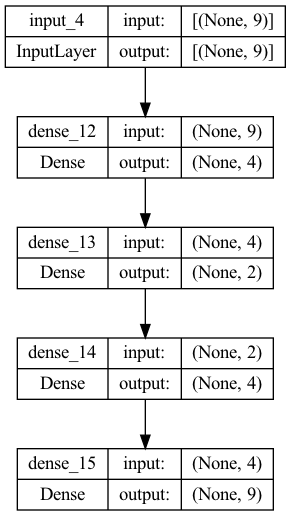

In [47]:
'Tensorflow'
from tensorflow.keras import layers
# Set the input size based on the number of features in the dataset
input_size = X.shape[1]
# Call the Autoencoder_Simple function, passing the input_size as an argument
decoder, encoder = Autoencoder_Simple(input_size)

# Plot the model architecture
plot_model(decoder, show_shapes=True, to_file='model.png')

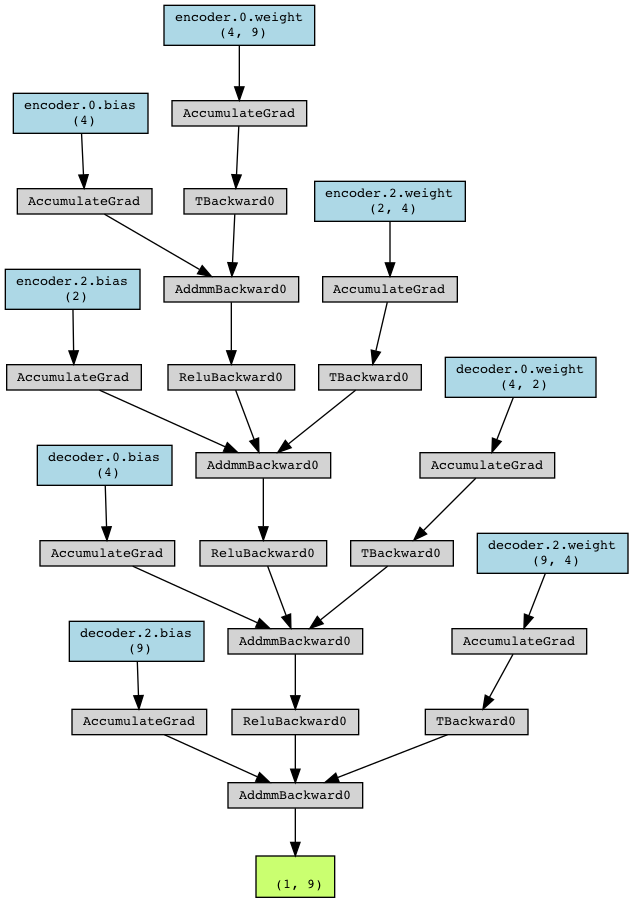

In [50]:
'PyTorch'
from torchviz import make_dot

# Set the input size based on the number of features in the dataset
input_size = X.shape[1]
# Call the Autoencoder_Simple class, passing the input_size as an argument
model = Autoencoder_Simple(input_size)

# Visualize the model architecture
x = torch.randn(1, input_size)
y = model(x)
make_dot(y, params=dict(list(model.named_parameters()))).render("model", format="png")

from IPython.display import Image
Image('model.png')

In [ ]:
'Tensorflow'
from tensorflow.keras.optimizers import Adam
# Set the number of epochs
n_epochs = 50

# Compile the model with Adam optimizer and mean squared error loss function
decoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model using the scaled training data and validation data
history = decoder.fit(X_train_scaled, X_train_scaled,
                    epochs=n_epochs, batch_size=16, verbose=2,
                    validation_data=(X_test_scaled, X_test_scaled))

In [ ]:
'PyTorch'
from torch import optim

# Set the number of epochs
n_epochs = 50

# Define the loss function
criterion = nn.MSELoss()

# Define the optimizer (Adam)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Convert the datasets to PyTorch tensors
X_train_scaled_torch = torch.tensor(X_train_scaled, dtype=torch.float)
X_test_scaled_torch = torch.tensor(X_test_scaled, dtype=torch.float)

# Train the model
for epoch in range(n_epochs):
    # Zero the gradients
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(X_train_scaled_torch)
    
    # Compute loss
    loss = criterion(outputs, X_train_scaled_torch)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/{n_epochs}, Loss: {loss.item()}')


In [ ]:
'Tensorflow'
# Plot the training and testing loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
'PyTorch'
# Initialize lists to store loss values
train_loss = []
test_loss = []

# Train the model
for epoch in range(n_epochs):
    # Zero the gradients
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(X_train_scaled_torch)
    
    # Compute loss
    loss = criterion(outputs, X_train_scaled_torch)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Store the training loss
    train_loss.append(loss.item())

    # Compute and store the testing loss
    model.eval()  # set the model to evaluation mode
    with torch.no_grad():  # disable gradient tracking
        outputs_test = model(X_test_scaled_torch)
        loss_test = criterion(outputs_test, X_test_scaled_torch)
        test_loss.append(loss_test.item())
    model.train()  # set the model back to training mode

# Plot the training and testing loss
plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')
plt.legend()
plt.show()